## Visualizing data in Python
<div "style="width:500px;">

Creating graphs via commands instead of menus can at first look rather tedious, but we have good reason to do it. Not only dooes it give us more fine-grained control - it also makes it easy to reproduce the exact same graph or graph style later on.

To create a plot, we need a library to take care of all the background business of turning data into 2D geometric objects. There are many libraries for creating plots - NumPy and Pandas have built-in functions for creating basic plots (we'll get to them later).

<img src="matplotimport.png" alt="Variables" style="float:right;">

The most common library for visualisation, however, is called **matplotlib**, and in particular its sub-library called **pyplot**. It contains a range of functions for creating and customising plots, so we begin by downloading and importing the library.



#### 1. Import the library
 Remember that we do this in the beginning of the script to keep things tidy.

We access pyplot the way we normally access object contents: `matplotlib.pyplot`. To avoid having to repeat this mouthful, Python gives you a way of giving it a nickname. By *convention* this nickname is `plt` and we will stick to that: `import matplotlib.pyplot as plt`.

</div>

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<div "style="width:500px;">

You will find those three lines on top of nearly every data analytic script in Python, so they are worth remembering.

#### 2. Access a plotting-function within the library

It only remains to access a plotting function within `plt` and plug in our data.

The function `plot` specifically creates *line graphs* which only asks for one NumPy array of numbers. For simplicity, we'll feed it with `np.arange(10)`, which you recall generates the array `[0,1,2,3,4,5,6,7,8,9]`. 

When we only pass one data-array, it assumes that it is the y-values and that the x-values are the natural number sequence 0,1,2,...9. 

If we had passed it a regular Python list instead of a NumPy array, the function would have converted it into a NumPy array. Now, it can proceed to create the graphics and send it to standard output for us to inspect.

</div>

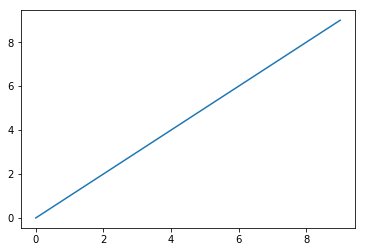

In [12]:
data = np.arange(10)
plt.plot(data)
plt.show()

<div "style="width:500px;">

That was easy - too easy, almost! So let's complicate things.

Suppose you wanted to have several *subplots* next to each other to simplify comparison. For example, suppose you wanted to compare it with the flat line `[6,6,6,6,6,6,6,6,6,6]`. To put two plots next to each other, Matplotlib requires a slightly different Step 2. 


    
#### 2. Create a figure

The first step is to create a *Figure* object. The Figure is like an empty canvas to which you bind the plots. We create it (by convention called `fig`) using the `plt.figure()` function. 

`fig = plt.figure()`

#### 3. Create a plot

Next step is to create individual plots on the Figure. Since they are parts of the Figure, we are better off thinking of them as *sub*plots.  

By default, subplots are arranged as a simple grid. The first two arguments in the `add_subplot()` function refers to the number of rows and rows, respectively. For example, if we want a grid with one row and two columns we would write:

`ax1 = fig.add_subplot(1,2,1)`

`ax2 = fig.add_subplot(1,2,2)`

The last argument is the index of the subplot that, for example, `ax1` will have. It will be the first out of the two.

<img src="matplotlib.png" alt="Variables" style="float:right;">

These functions return plots - technically *AxesSubplot* objects, or *Axes* for short. Think of this as a a composite element consisting of two *Axis* objects, along with labels and such.  

**Extension:** If you ever see other people's code, you may find that steps 2 and 3 are done in one swoop: `fig, axes = plt.subplots(1,2)` where `subplots()` is a function that takes the number of rows and columns. To access a specific axis, we would need to use indexing, e.g. `axes[1,1]`.

**Extension:** Other subdivisions than a simple grid are [possible](https://matplotlib.org/users/gridspec.html).

#### 4. Draw the plot

It only remains to actually use the plot function like before, except instead of invoking functions from library `plt.plot(data)`, we invoke them on the particular axis: `ax1.plot(data)`. Axes-objects are equipped with their own plot functions.

We *could* still use the old way, in which case matplotlib applies it to the last subplot (and figure) used. In the first example above, using `plt.plot(data)`, matplotlib created a new figure and subplot behind the scenes since there were no pre-existing ones.

**Extension:** It is possible to include several plots on the same axes. **TODO**

#### 5. Show the plot

Finally, show the plot using `plt.show()`. Notebooks like this show them automatically, however, so it is only strictly necessary when programming elsewhere.



</div>

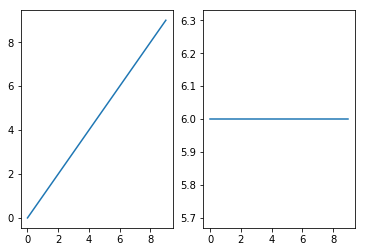

In [32]:
#Create data2
data = np.arange(10)
data2 = np.array([6,6,6,6,6,6,6,6,6,6])

#Create figure
fig = plt.figure()

#Create subplots
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#Draw plots
ax1.plot(data)
ax2.plot(data2)

#Show the plot
plt.show()

<div "style="width:500px;">

To stay focused, we will only deal with single plots in the future. As you can predict, we simply create these by `ax = fig.add_subplot(1,1,1)`.


Now, notice that a plot consists of many graphic elements: lines, axes, axis-ticks, axis-numbers. The `plot` function has default settings for each of these. For example, it chooses to make the line blue, and so forth. By default it also omits any titles, labels, and annotations or other things. 

How can we customise the plot and override the defaults? How could we, for example, make a line red, or add a title?

#### 4. Customise the plot

Fully specifying a plot in a single line would be quite the headache. For this reason - to simplify customisation - matplotlib allows you to create plots gradually, in steps.

This is where the beauty of Axes objects comes in. An Axes object also has built-in functions that allow you to change the settings.

Normally, we do this in a loop: make a change, check if it looks alright, then make additional changes until you are happy.

Again, you can choose to do this via `plt`, for example, `plt.set_xlabel('My data')`, or via the Axes objects: `ax.set_xlabel('Mydata')`. And again, for consistency's sake, we will stick to the latter.

Example:
`set_xticks()`
`set_xticklabels()`
`set_title()`
`set_xlabel()`
`set_xlim()`
`set_ylim()`

Color (notice the American spelling) can be specified in a variety of ways, using abbreviations 'g' or RGB values. 

<div "style="width:500px;" >

#### 5. Save the graph

As an optional last step, you may want too save the graph in order to use it in a report or website. This is easily done using the function `savefig()` which takes the filename (*fname*) and format (*format*) as argument (among other kwargs). For example, to save as a PNG:

</div>

In [33]:
fig.savefig(fname="My first plot", format="png")

# Exploring different visualizations

## Single variables

<div "style="width:500px;">
    
The simplest form of dataset we deal with is when we have a single variable. It could be *categorical* (like gender), *ordinal* (like ratings), or *continuous* (like height).

Either way, we would store them in a Pandas DataFrame column, presumably with some ID attached to each value (for example: the name of the participant, or an arbitrary, anonymous number). 

<img src="frequency_tables.png" alt="Variables" style="width:50%;height:50%;">

The main thing a visualisation could help us with in dealing with an individual variable is to give us a sense of the *distribution*. Which values are common? Which values are rare? 

For this, we need to calculate the *frequency* for each value. For ordinal or categorical values, this is straightforward, but for continuous values there may never be two values with 51.4 specifically, so we may choose to "bin" it into the category "55-60". 



Later on, you will learn how to compute frequencies in Python, but for this section we will assume we already have them (like the tables to the right). **Some functions will compute the frequencies for you and therefore only expect one data series argument; others will expect them to be pre-computed and therefore expect two data series arguments**.

Despite having two columns, don't forget that we ultimately only have *one* variable.



By the way: when we deal with distributions, we have the choice to *normalise* if we want. We normalise when we express absolute frequencies are percentages instead. For example, if there are 52 A and 34 B, then 52/(52+34)=0.6 is the normalised frequency of A. 



### Preparing the data

We are gonna load in the data. One continuous, one categorical and one ordinal.

Next, we are gonna go through common charts one by one. For simplicity, we are gonna use the shortcut method.

</div>



__ | Name | Function | Key Arguments | Pandas example
--- | --- | --- | --- | ---
<img src="icons/singlevar1.png" width="20%" height="20%" /> | [**Histogram**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) | `hist()` | *x, bins* | `df.hist(bins=3)`
<img src="icons/singlevar2.png" width="20%" height="20%" /> | [**Box plot**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) | `boxplot()` | *x* | `df.boxplot()`
<img src="icons/singlevar3.png" width="20%" height="20%" /> | [**Violin plot**](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.violinplot.html) | `violinplot()` | *vpstats* | None
<img src="icons/singlevar4.png" width="20%" height="20%" /> | [**Scatter plot**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) | `scatter()` | *x, y* | `df.scatter(x,y)`


#### Histograms

<div "style="width:500px;">

As we mentioned before, continuous values need to be binned before their frequency can be visualised. For continuous measures, this can be tricky, but thankfully the histogram function `hist` does this calculation for us. We simply state in an argument how many bins we desire, or leave it to default.

Pandas = `df.hist(bins=50)'

</div>

(array([13., 16.,  8.,  5., 12., 13.,  9.,  8.,  8.,  8.]),
 array([ 0. ,  9.7, 19.4, 29.1, 38.8, 48.5, 58.2, 67.9, 77.6, 87.3, 97. ]),
 <a list of 10 Patch objects>)

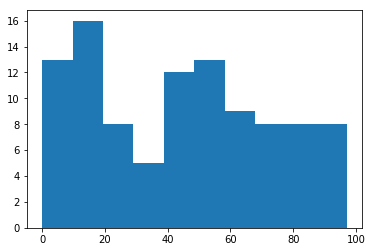

In [15]:
### create some data
pop = np.random.randint(0,100,100)

fig = plt.figure()

plt.hist(pop)

For fun, let's customise a bit:

(array([ 5.,  8., 11.,  5.,  4.,  4.,  3.,  2.,  6.,  6.,  5.,  8.,  5.,
         4.,  4.,  4.,  6.,  2.,  4.,  4.]),
 array([ 0.  ,  4.85,  9.7 , 14.55, 19.4 , 24.25, 29.1 , 33.95, 38.8 ,
        43.65, 48.5 , 53.35, 58.2 , 63.05, 67.9 , 72.75, 77.6 , 82.45,
        87.3 , 92.15, 97.  ]),
 <a list of 20 Patch objects>)

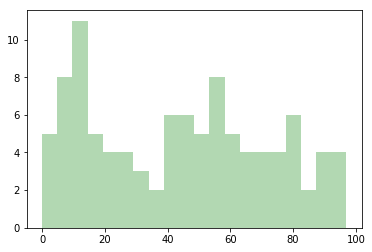

In [18]:
plt.hist(pop, bins = 20, color = 'g', alpha=0.3)

#### Dotplots

#### Scatter

#### Boxplot

#### Violin plots

### Categorical

<div "style="width:500px;">

#### Bar chart

When the x-axis is categorical, it is appropriate to instead use a bar chart.

Unlike hist, we cannot provide the raw data, but rather provide the frequency data. We use the `bar()` function. If we would like a horizontal bar chart, we use `barh()`.

Later, we will learn about the importance of adding error bars to bar charts, which can be further customised. 


</div>

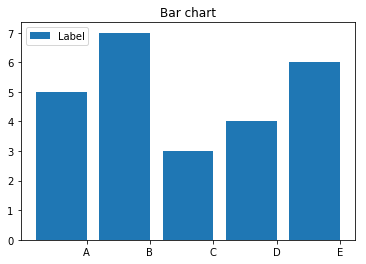

In [23]:

index = np.array([0,1,2,3,4])
values = [5,7,3,4,6]
plt.bar(index,values, label='Label')
plt.xticks(index+0.4,['A','B','C','D','E'])
plt.title('Bar chart')
plt.legend(loc=2)

In [ ]:
#index = np.arange(4)
#series1 = np.array([3,4,5,3])
#plt.barh(index,series1,color='r', bottom=series1)

#### Pie charts

## Two variables, continuous



### Scatterplots

In [ ]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

Let's customise!

### Plots

<div "style="width:500px;">

The general-purpose `plot`-function accepts arrays of X and Y coordinates. Between individual points, the function *interpolates* what should be in between. Beyond this you could specify things like color, marker (indicating dot-locations), drawstyle and linestyle.

The Pandas version of this is `df.plot(kind='line')`

</div>

In [ ]:
ax.plot(x,y,linestyle='--', color='g')

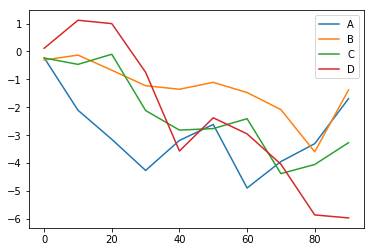

In [30]:
#REDO
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), columns=['A','B','C','D'], index=np.arange(0,100,10))
df.plot()